# Analysis of the MD1 equilirium MADS-Sensitivity runs

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
%matplotlib inline

/Users/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## SA STEP2

In [44]:
ls SA-MD1-STEP2_val

info.txt           param_props.csv    results.csv        sample_matrix.csv


In [37]:
cat SA-MD1-STEP2_val/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[2.325, 3.875]",3.383716,1,0
nmax,"[1.875, 3.125]",1.54588,1,1
nmax,"[1.875, 3.125]",1.000042,1,2
nmax,"[1.575, 2.625]",3.551762,1,3
krb(0),"[-4.5, -7.5]",-6.0,1,0
krb(0),"[-2.5875, -4.3125]",-3.45,1,1
krb(0),"[-2.2125, -3.6875]",-2.95,1,2
krb(0),"[-3.4875, -5.8125]",-4.65,1,3
krb(1),"[-3.66, -6.1]",-4.88,1,0
krb(1),"[-3.863, -6.4375]",-5.15,1,1
krb(1),"[-4.99, -8.3125]",-6.65,1,2
krb(2),"[-6.15, -10.25]",-8.2,1,0
krb(2),"[-4.65, -7.75]",-6.2,1,1
krb(2),"[-2.4, -4.0]",-3.2,1,2


In [35]:
cat SA-MD1-STEP2_bnd2/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[2, 4]",3.383716,1,0
nmax,"[1, 3]",1.54588,1,1
nmax,"[0.5, 1.5]",1.000042,1,2
nmax,"[0.1, 5]",3.551762,1,3
krb(0),"[-4, -0.1]",-6.0,1,0
krb(0),"[-4, -3]",-3.45,1,1
krb(0),"[-30, -0.1]",-2.95,1,2
krb(0),"[-20, -0.1]",-4.65,1,3
krb(1),"[-6, -2]",-4.88,1,0
krb(1),"[-5, -0.1]",-5.15,1,1
krb(1),"[-20, -0.1]",-6.65,1,2
krb(2),"[-10, -0.1]",-8.2,1,0
krb(2),"[-20, -0.1]",-6.2,1,1
krb(2),"[-4, -1]",-3.2,1,2


In [36]:
cat SA-MD1-STEP2_bnd1/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[2, 4]",3.383716,1,0
nmax,"[1, 3]",1.54588,1,1
nmax,"[0.5, 1.5]",1.000042,1,2
nmax,"[0.1, 5]",3.551762,1,3
krb(0),"[-20, -0.1]",-6.0,1,0
krb(0),"[-4, -3]",-3.45,1,1
krb(0),"[-20, -0.1]",-2.95,1,2
krb(0),"[-20, -0.1]",-4.65,1,3
krb(1),"[-6, -2]",-4.88,1,0
krb(1),"[-5, -0.1]",-5.15,1,1
krb(1),"[-20, -0.1]",-6.65,1,2
krb(2),"[-10, -0.1]",-8.2,1,0
krb(2),"[-20, -0.1]",-6.2,1,1
krb(2),"[-4, -1]",-3.2,1,2


In [46]:
path='SA-MD1-STEP2_val/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

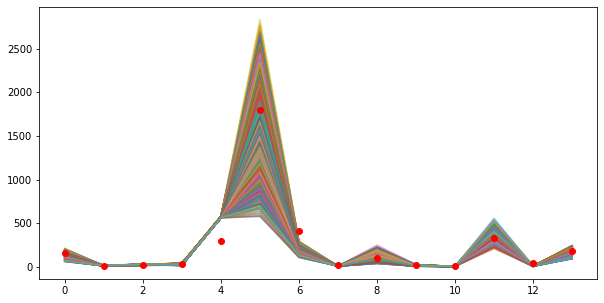

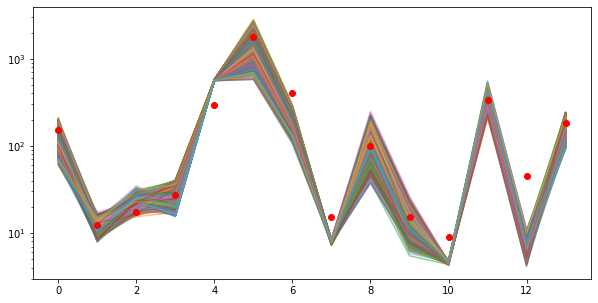

In [47]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

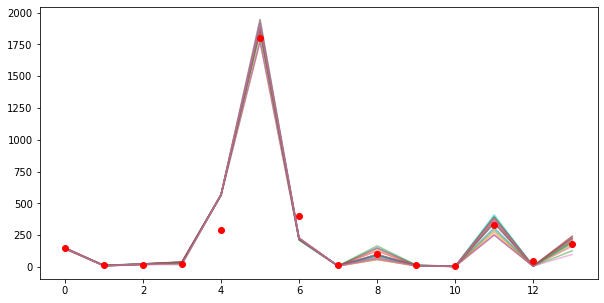

In [49]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.96)
ymodel.iloc[0:-1,:].transpose().plot(legend=False,alpha=0.5,figsize=(10,5))
df_model.iloc[-1,:].plot(legend=False,style="o",color='red');

In [50]:
path='SA-MD1-STEP2_bnd2/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

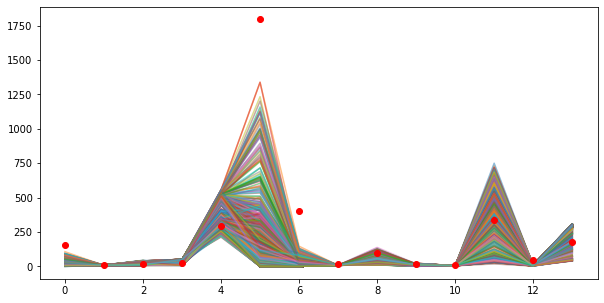

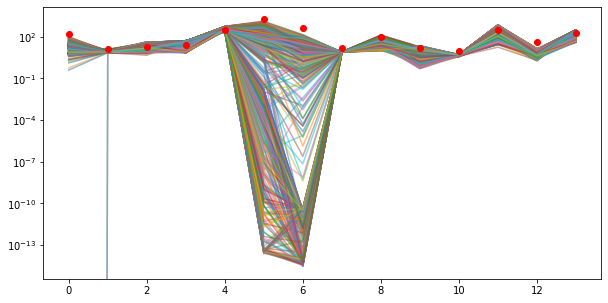

In [51]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

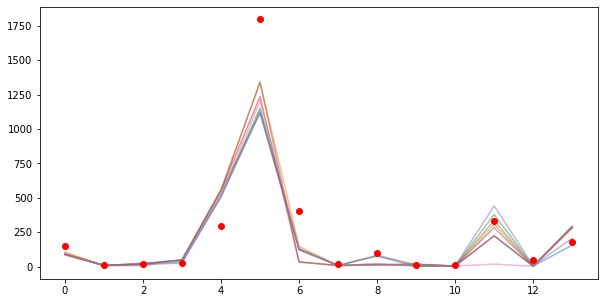

In [52]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.5)
ymodel.iloc[0:-1,:].transpose().plot(legend=False,alpha=0.5,figsize=(10,5))
df_model.iloc[-1,:].plot(legend=False,style="o",color='red');

In [53]:
path='SA-MD1-STEP2_bnd/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

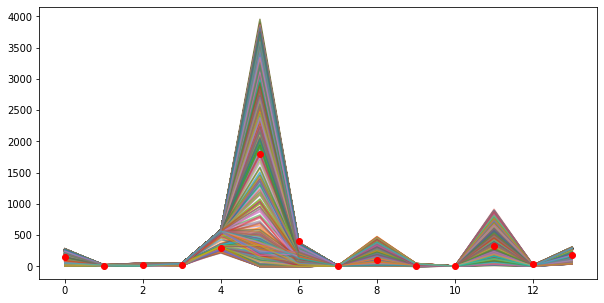

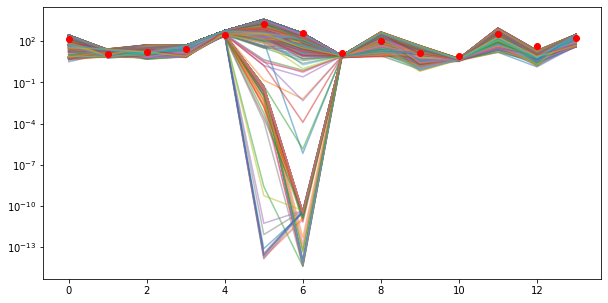

In [54]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

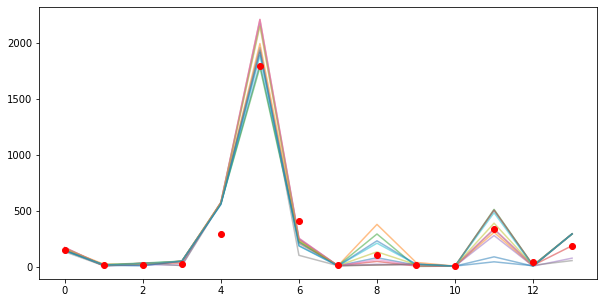

In [55]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.93)
ymodel.iloc[0:-1,:].transpose().plot(legend=False,alpha=0.5,figsize=(10,5))
df_model.iloc[-1,:].plot(legend=False,style="o",color='red');

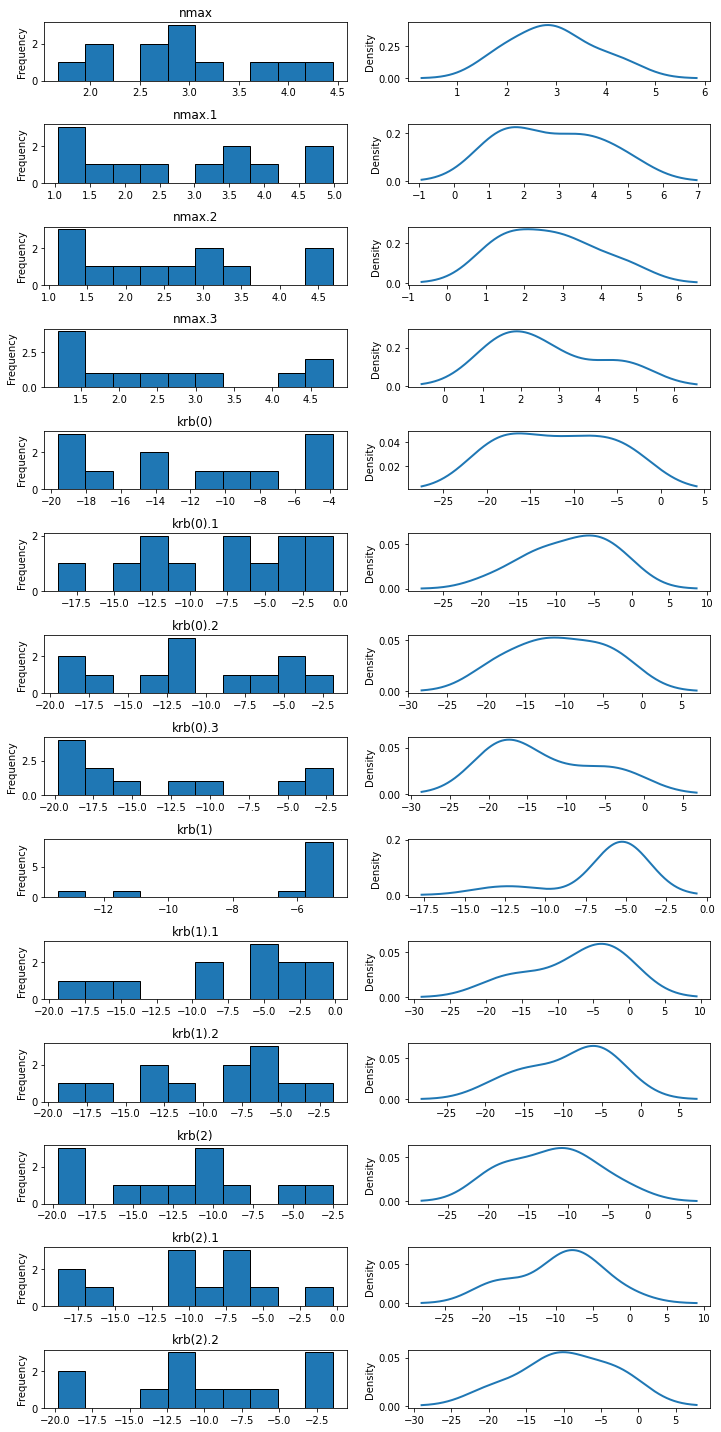

In [125]:
def plot_hist_dist(df):
    n=len(df.columns)
    # crate subplots and don't share x and y axis ranges
    fig, axes = plt.subplots(n, 2, figsize=(10,20), sharex=False, sharey=False)

    # flatten the axes for easy selection from a 1d array
    axes = axes.flat

    i=0
    for ilist in df.columns:
        df[ilist].plot(ax=axes[i], kind='hist', ec='k')
        df[ilist].plot(ax=axes[i+1], kind='kde',linewidth=2)
        axes[i].set_title(ilist, fontsize=12)
        i+=2

    fig.tight_layout()
    
plot_hist_dist(xparams)

In [41]:
output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
               'VEGC20','VEGC21','VEGC22']
df_model.columns = output_name
df_model.head()

NPP0       NPP1       NPP2       NPP3      VEGC00       VEGC01  \
0   69.934597  14.596131  26.251137  22.215954  563.770355   695.391101   
1  206.688006  10.384752  24.032670  38.760281  577.417462  2754.093188   
2  192.097023   8.630920  16.424176  31.831743  576.548975  2549.481421   
3   78.121061  10.215815  22.475073  16.566636  559.841229   857.738226   
4   83.379599   8.844194  29.843472  17.878988  563.610895   900.202216   

       VEGC02    VEGC03      VEGC10     VEGC11    VEGC12      VEGC20  \
0  127.787745  8.282814  183.455931  16.708204  4.716891  410.326068   
1  292.216476  7.923333   93.211372  10.179345  4.387934  382.464966   
2  271.727383  7.988304   50.593880   6.338987  4.447676  225.475282   
3  126.610356  8.235051   81.648701  12.021969  4.347715  342.103851   
4  145.602701  8.116256   57.537445   8.962064  4.721280  479.220749   

     VEGC21      VEGC22  
0  8.549747  132.468172  
1  6.632466  231.776147  
2  5.587248  190.327519  
3  7.494876   98.880589  
4  9.594475  106.745882

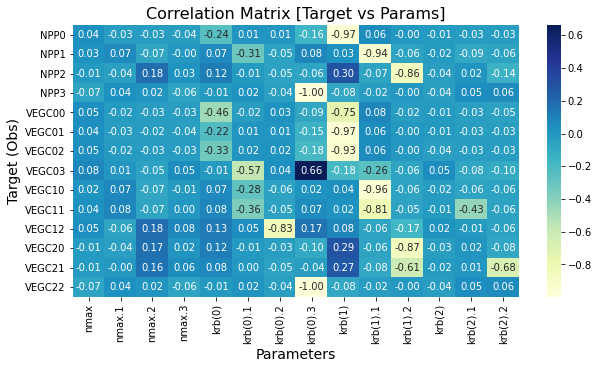

In [42]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

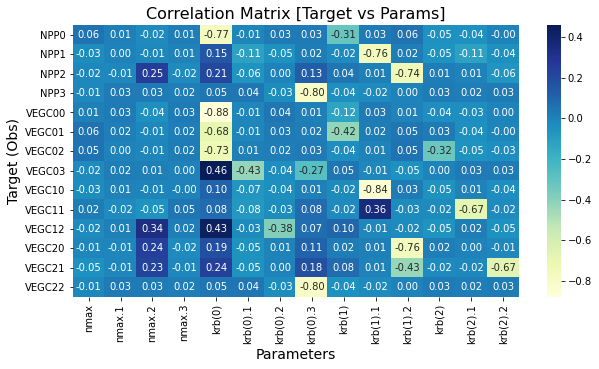

In [34]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

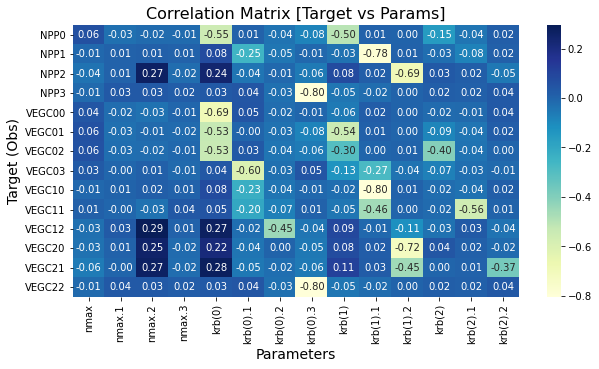

In [9]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

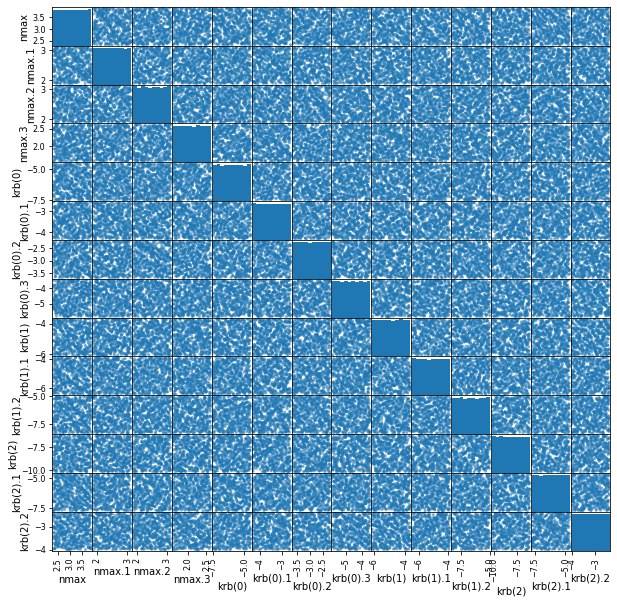

In [43]:
scatter_matrix(df_param, alpha=0.6,figsize=(10,10));

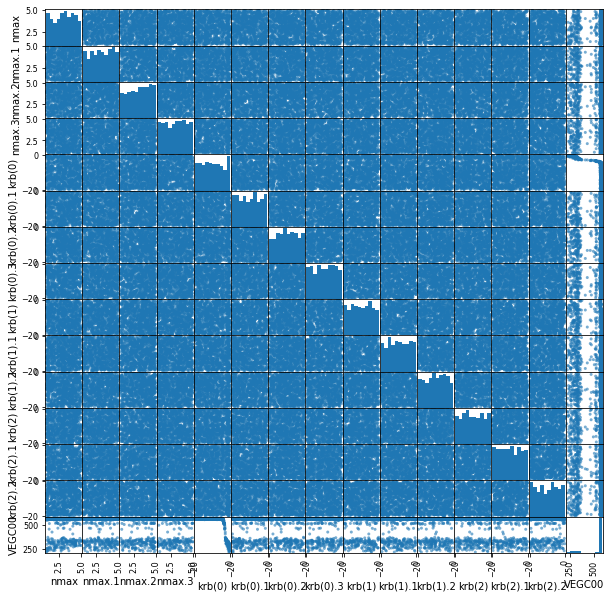

In [28]:
df_param_npp1=pd.concat([df_param,df_model['VEGC00']], axis=1)
scatter_matrix(df_param_npp1, alpha=0.6,figsize=(10,10));

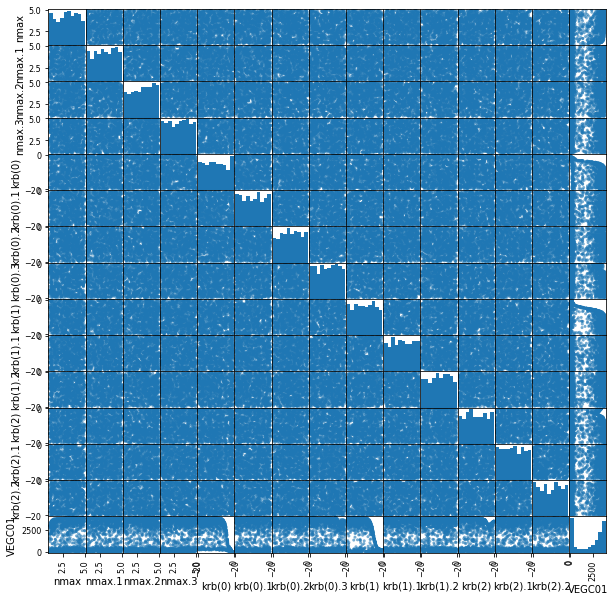

In [25]:

from pandas.plotting import scatter_matrix
scatter_matrix(df_param_npp1, alpha=0.6,figsize=(10,10));

In [5]:
xparams

nmax    nmax.1    nmax.2    nmax.3    krb(0)  krb(0).1  krb(0).2  \
493  3.190673  3.844962  4.442381  4.742262 -4.385666 -7.008715 -11.37096   

      krb(0).3   krb(1)  krb(1).1  krb(1).2     krb(2)   krb(2).1  krb(2).2  
493 -17.769008 -5.87623 -0.244528 -5.338464 -19.667449 -10.124426 -7.768532

In [6]:
 ymodel

0         1          2          3          4            5   \
493  149.181589  7.667752  22.473809  48.966434  562.27851  1935.595386   

             6         7          8          9         10          11  \
493  208.493132  8.003346  13.889835  21.055051  4.742559  333.030145   

           12          13  
493  9.378756  292.836688

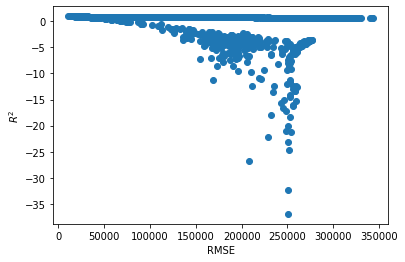

In [4]:
ut.plot_r2_rmse(df_model)

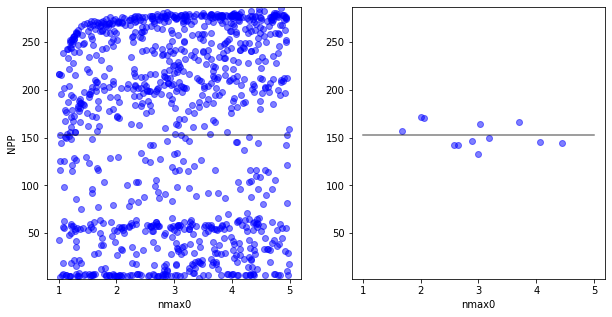

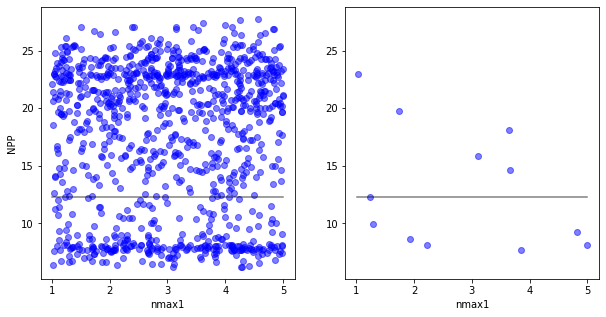

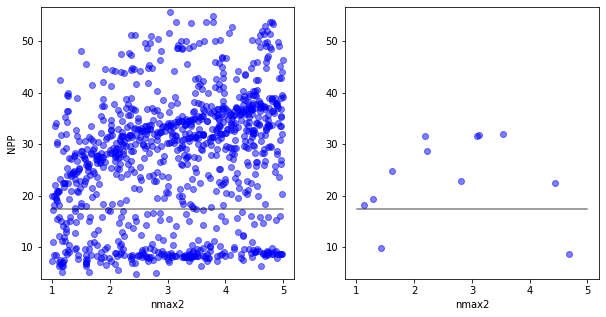

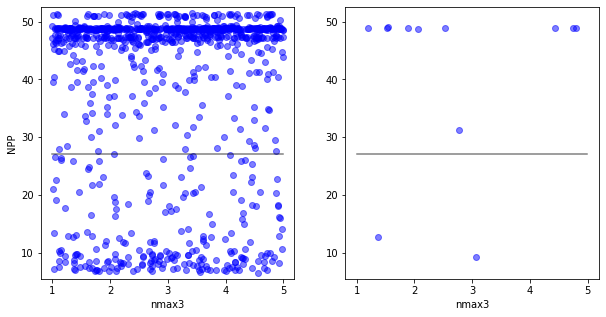

In [5]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='nmax'+str(i),ylabel='NPP')

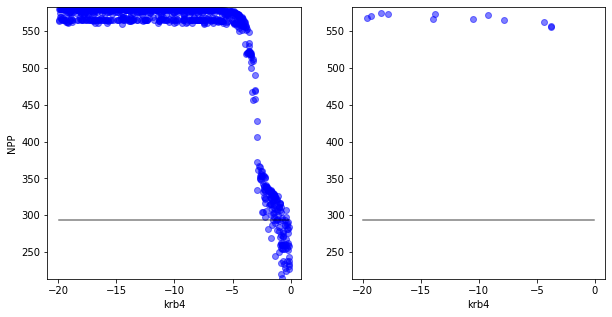

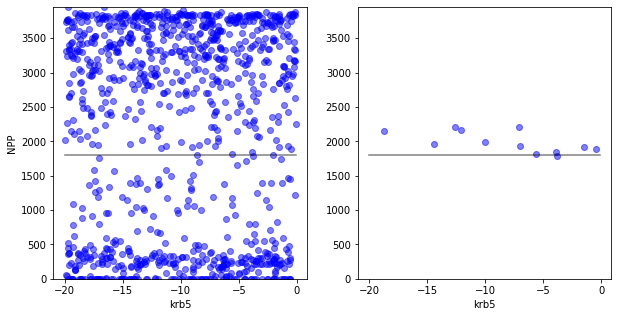

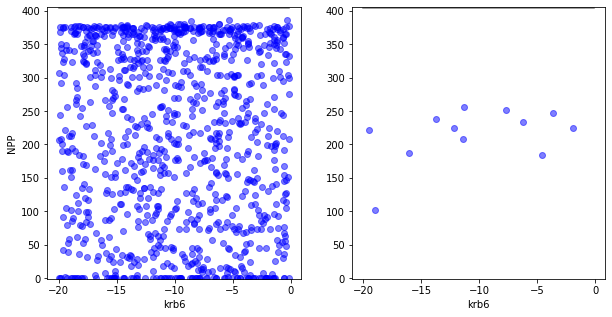

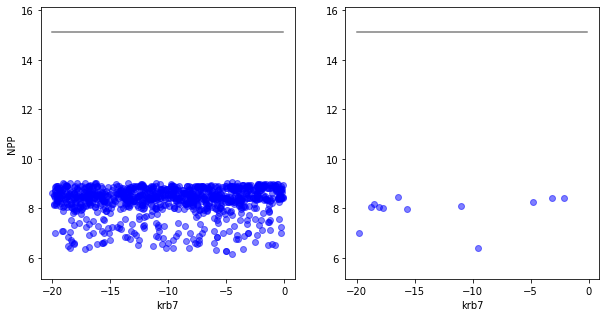

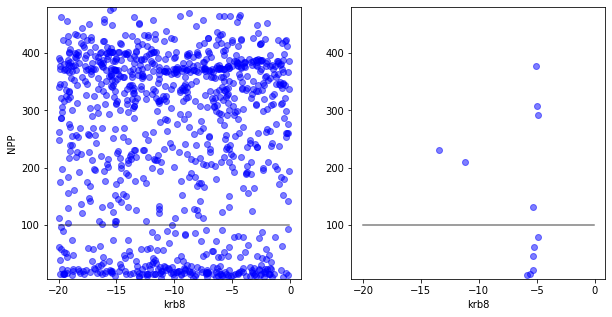

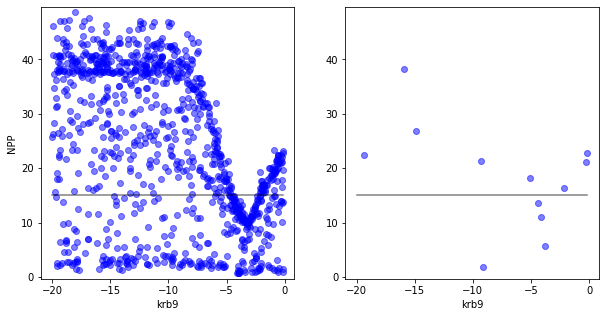

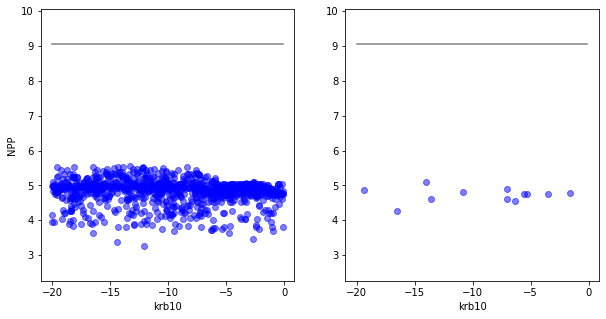

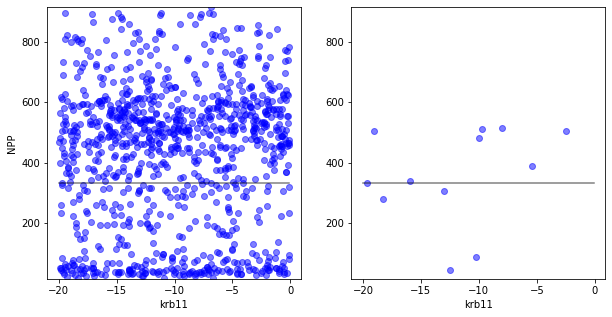

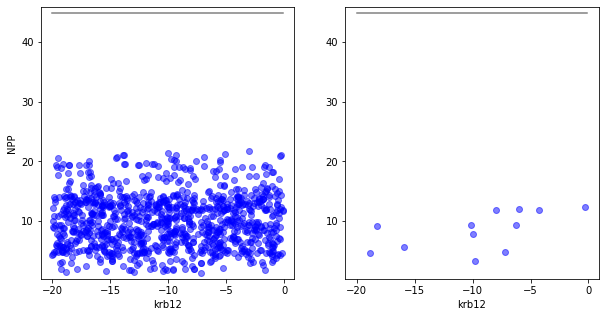

In [11]:
for i in range(4,13):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.93,xlabel='krb'+str(i),ylabel='NPP')

## SA STEP2 bnd

In [28]:
path='SA-MD1-STEP2_bnd1/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

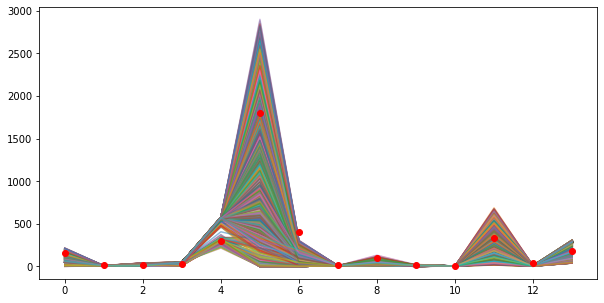

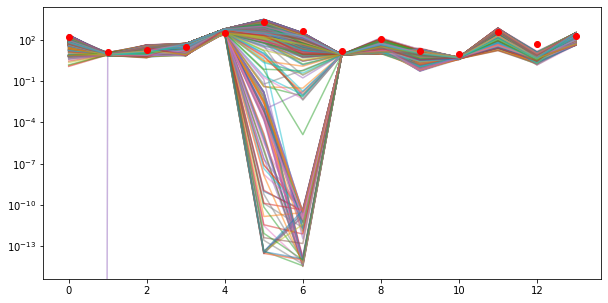

In [29]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

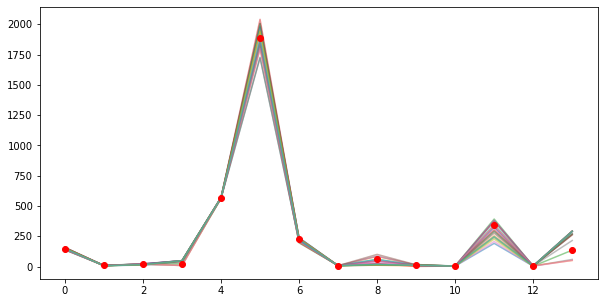

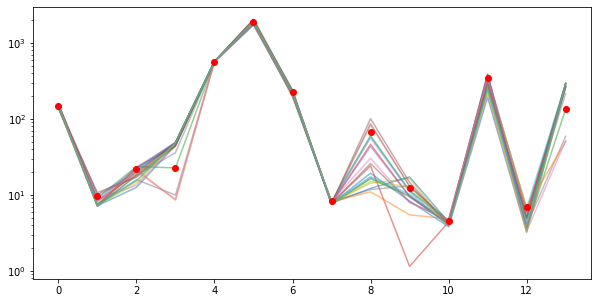

In [32]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.95)
ut.spaghetti_match_plot(ymodel)
ut.spaghetti_match_plot(ymodel,logy=True)

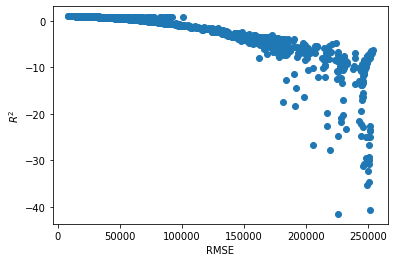

In [52]:
ut.plot_r2_rmse(df_model)

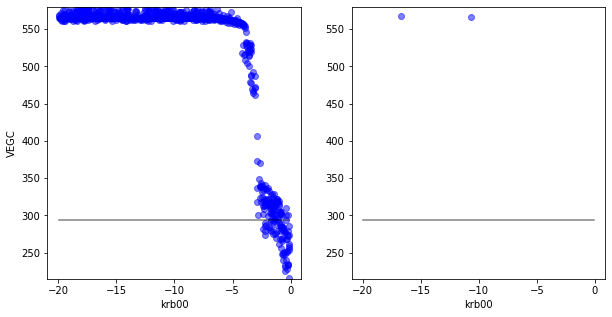

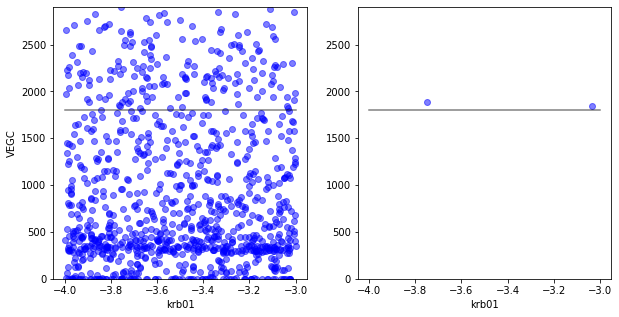

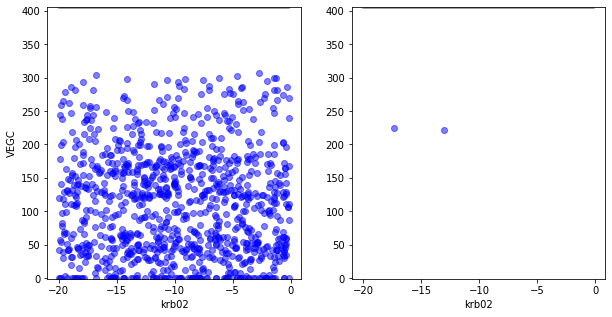

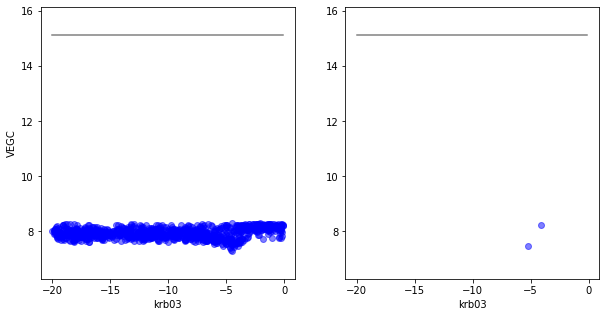

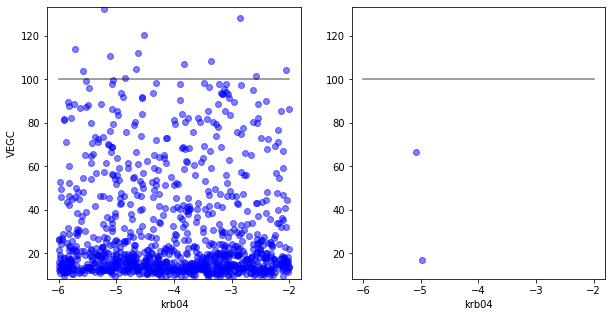

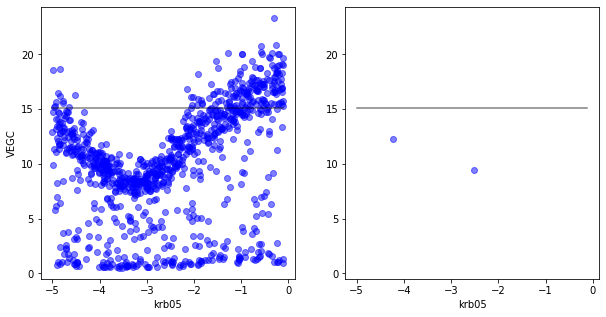

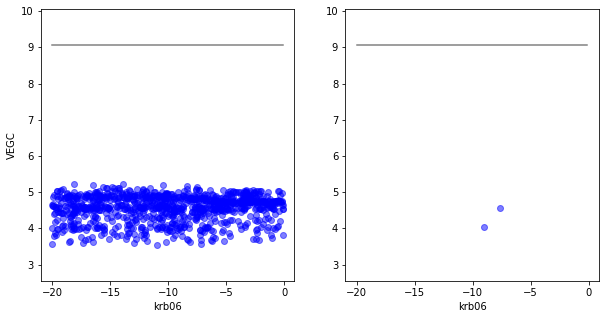

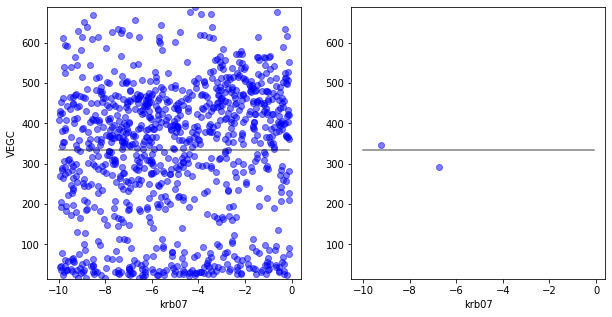

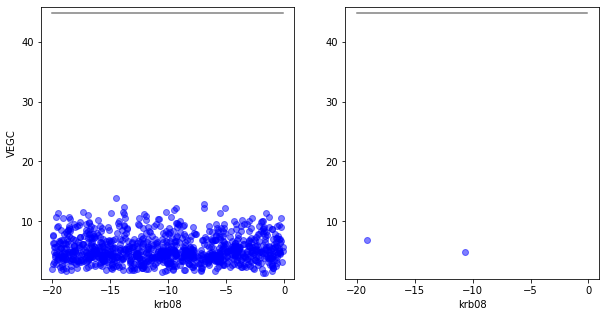

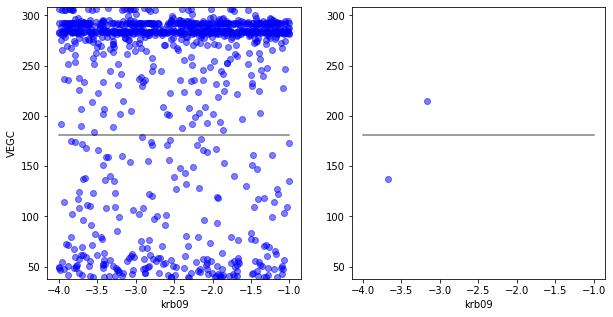

In [53]:
for i in range(4,14):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='krb0'+str(i-4),ylabel='VEGC')

## SA STEP2 bnd

In [33]:
path='SA-MD1-STEP2/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [63]:
cat SA-MD1-STEP2/param_props.csv

name,bounds,initial,cmtnum,pftnum
nmax,"[1, 5]",3.383716,1,0
nmax,"[1, 5]",1.54588,1,1
nmax,"[1, 5]",1.000042,1,2
nmax,"[1, 5]",3.551762,1,3
krb(0),"[-20, -0.1]",-6.0,1,0
krb(0),"[-20, -0.1]",-3.45,1,1
krb(0),"[-20, -0.1]",-2.95,1,2
krb(0),"[-20, -0.1]",-4.65,1,3
krb(1),"[-20, -0.1]",-4.88,1,0
krb(1),"[-20, -0.1]",-5.15,1,1
krb(1),"[-20, -0.1]",-6.65,1,2
krb(2),"[-20, -0.1]",-8.2,1,0
krb(2),"[-20, -0.1]",-6.2,1,1
krb(2),"[-20, -0.1]",-3.2,1,2


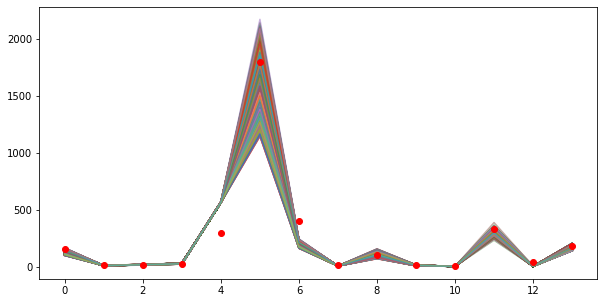

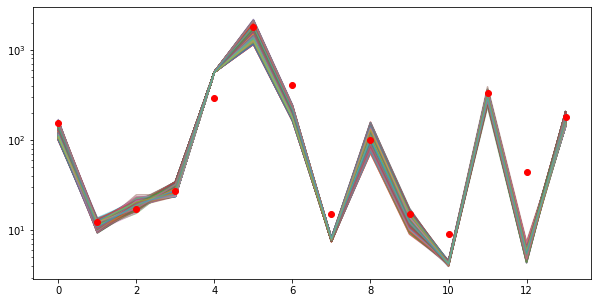

In [34]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

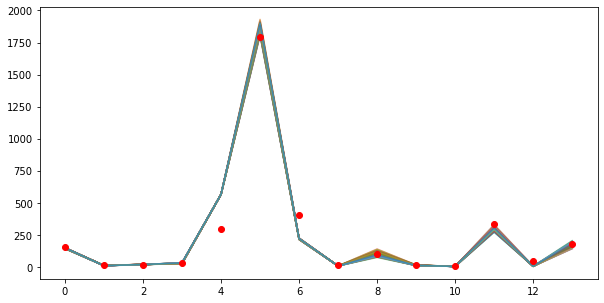

In [45]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.962)
ymodel.iloc[0:-1,:].transpose().plot(legend=False,alpha=0.5,figsize=(10,5))
df_model.iloc[-1,:].plot(legend=False,style="o",color='red');

In [40]:
xparams

nmax    nmax.1    nmax.2    nmax.3    krb(0)  krb(0).1  krb(0).2  \
6    3.255800  1.491831  1.045965  3.649476 -6.464655 -3.430828 -2.725561   
55   3.120214  1.652995  0.925537  3.478800 -6.356754 -3.208443 -2.790258   
58   3.129709  1.675994  1.074024  3.565144 -6.109531 -3.380312 -2.687309   
63   3.058683  1.423480  1.060028  3.323415 -6.183295 -3.269346 -2.713670   
65   3.444822  1.474171  1.024873  3.487412 -6.062457 -3.405927 -2.828735   
..        ...       ...       ...       ...       ...       ...       ...   
905  3.093940  1.420440  1.016617  3.233284 -5.804312 -3.624708 -2.828665   
914  3.602844  1.540021  1.034849  3.505578 -6.070468 -3.145052 -3.065795   
948  3.162050  1.577202  1.042481  3.421820 -6.047408 -3.581735 -2.903590   
960  3.301270  1.622477  1.082625  3.732853 -5.672552 -3.717932 -2.883673   
999  3.051831  1.479050  0.923899  3.269616 -5.492985 -3.514349 -2.766715   

     krb(0).3    krb(1)  krb(1).1  krb(1).2    krb(2)  krb(2).1  krb(2).2  
6   -4.848318 -5.134526 -5.213116 -7.010386 -8.189825 -6.228189 -3.153626  
55  -4.856695 -5.094756 -5.295382 -6.907951 -8.270068 -5.892231 -3.101245  
58  -4.496733 -5.175585 -4.639771 -6.428554 -8.032997 -6.246371 -3.468708  
63  -4.411150 -5.096933 -5.516367 -7.089192 -8.031381 -6.408426 -3.011190  
65  -5.067062 -5.137279 -4.779317 -7.140062 -8.179387 -6.689245 -3.391907  
..        ...       ...       ...       ...       ...       ...       ...  
905 -4.894877 -5.119576 -4.888202 -6.954333 -8.606354 -6.072843 -3.014669  
914 -4.234127 -5.189475 -5.484695 -6.300313 -7.910807 -6.176825 -3.261864  
948 -4.979234 -5.145033 -4.701606 -6.811097 -7.765934 -6.271323 -3.492409  
960 -4.720893 -5.203481 -4.829047 -7.028398 -8.357707 -6.687744 -2.990061  
999 -4.520956 -5.233329 -5.072068 -7.202869 -8.196618 -6.074557 -3.360249  

[62 rows x 14 columns]

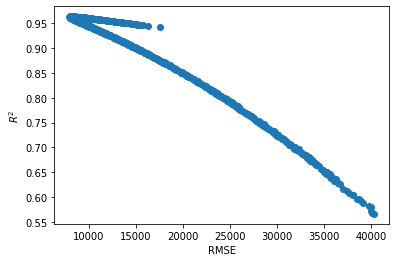

In [46]:
ut.plot_r2_rmse(df_model)

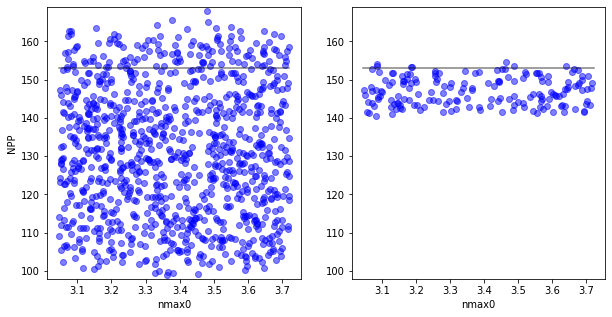

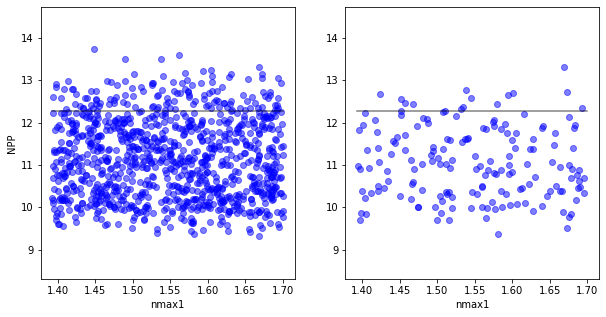

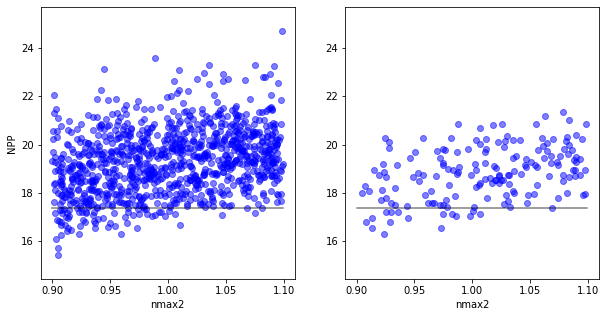

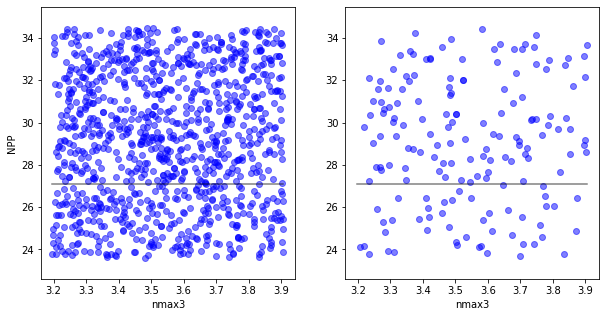

In [47]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='nmax'+str(i),ylabel='NPP')

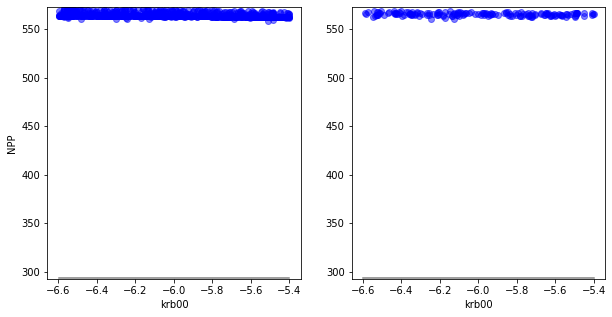

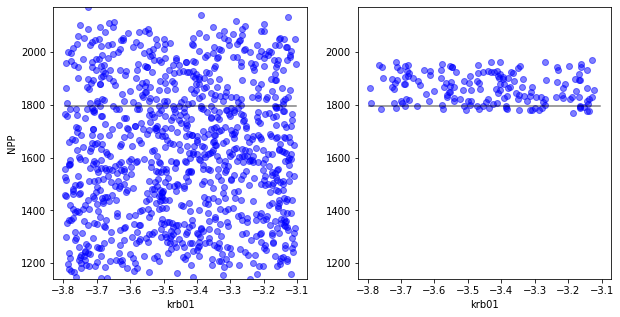

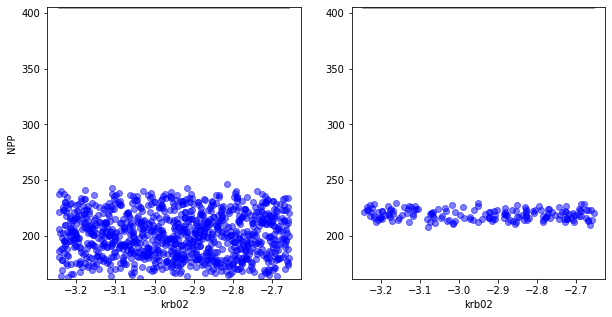

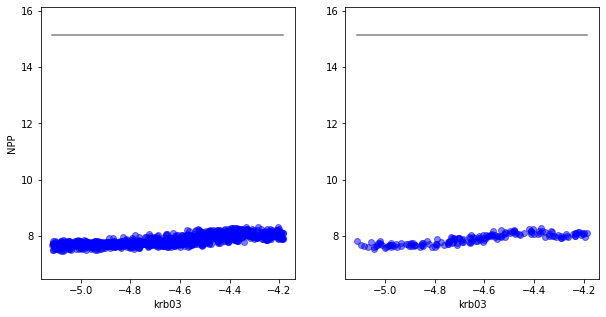

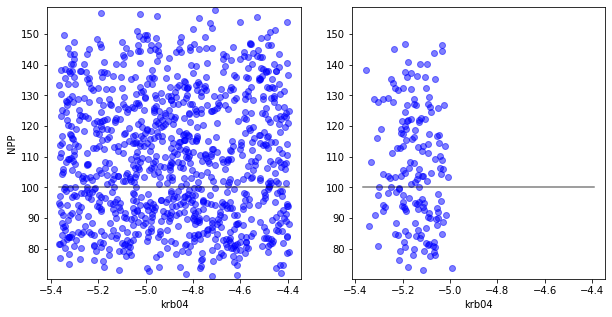

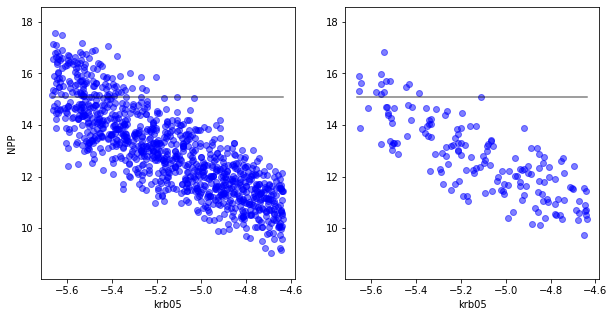

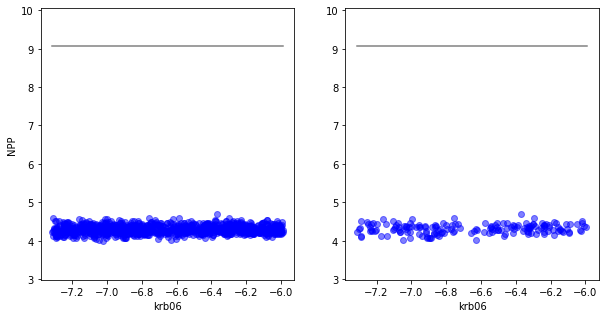

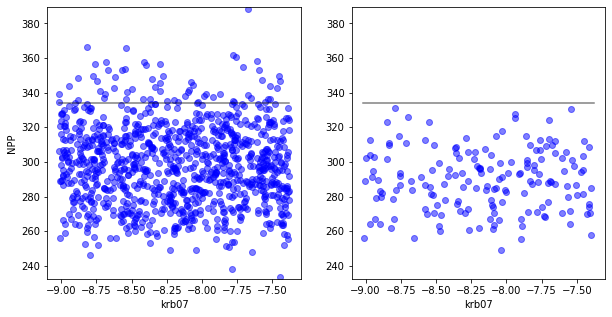

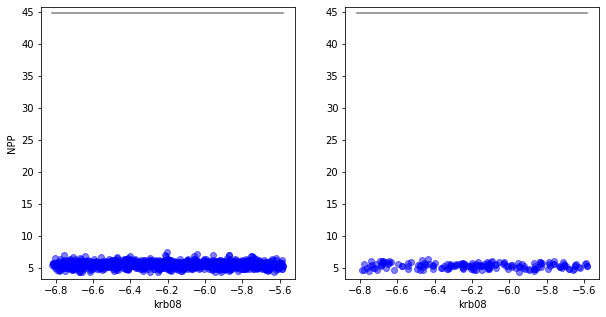

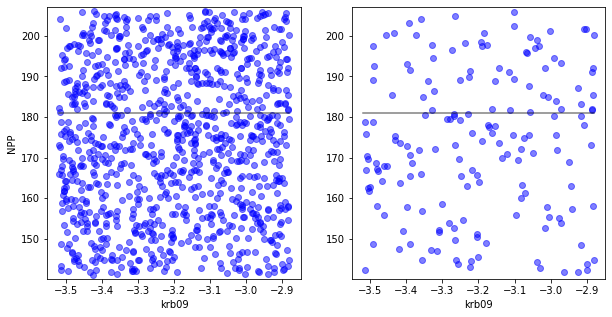

In [49]:
for i in range(4,14):
    ut.plot_paramcvstarget(df_param,df_model,i,r2lim=0.96,xlabel='krb0'+str(i-4),ylabel='NPP')

## SA STEP1

In [12]:
path='SA-MD1-STEP1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)

In [13]:
df_param.head()

cmax      cmax.1      cmax.2      cmax.3
0  304.672433  196.092846  288.617103  108.042352
1  171.394909   51.222722   61.658618  147.982790
2  442.861783  151.861485   49.029722  163.470253
3  583.949853   61.493824  103.332041   46.044853
4  261.797349  118.444634  187.567088   62.143091

In [14]:
df_model.head()

0          1          2          3
0  247.941825  43.630780  63.702678  62.791961
1  139.592580  10.593281  13.564094  83.261826
2  368.682895  32.804915  10.911346  95.112943
3  477.904659  13.882124  23.064703  26.608003
4  204.237388  25.607911  41.812459  36.036832

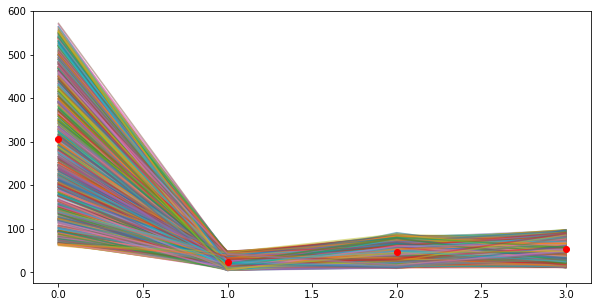

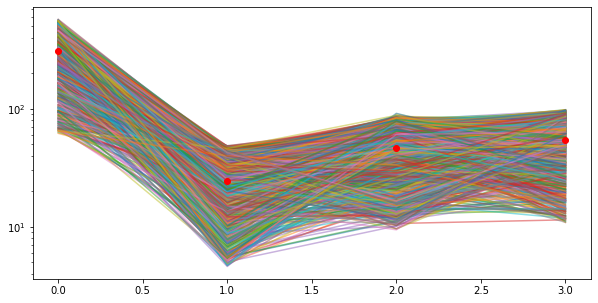

In [16]:
ut.spaghetti_match_plot(df_model)
ut.spaghetti_match_plot(df_model,logy=True)

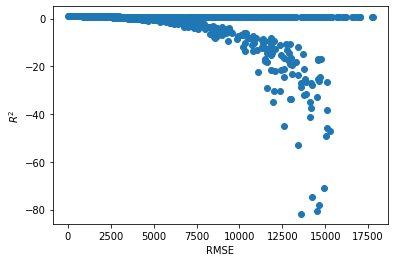

In [17]:
ut.plot_r2_rmse(df_model)

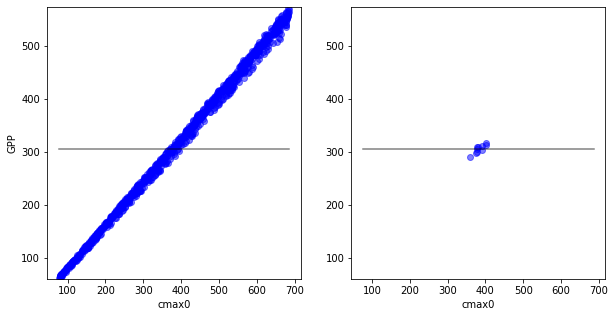

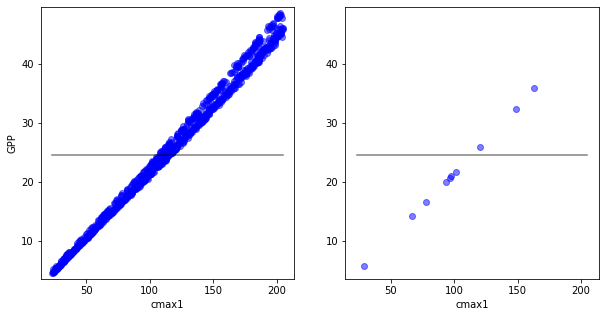

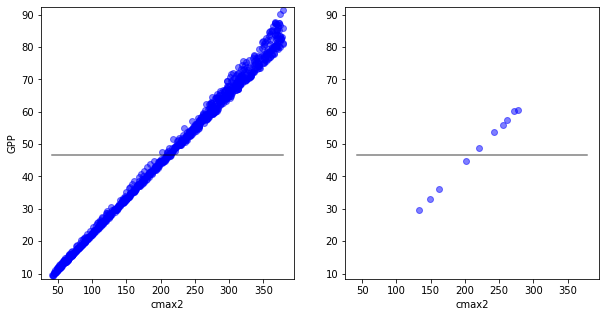

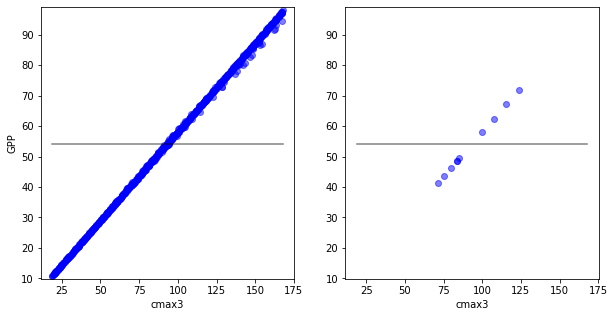

In [21]:
for i in range(4):
    ut.plot_paramcvstarget(df_param,df_model,i, \
                r2lim=0.99,xlabel='cmax'+str(i),ylabel='GPP')

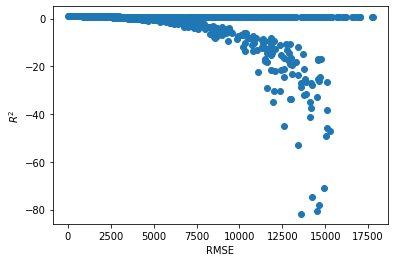

In [14]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

In [ ]:
this is dominate by the cmax0, how to grab other values assuming they are disjoint

In [2]:
path='MD1/csv/'
model='out_step1.csv'
params='param_step1.csv'
model='out_step2.csv'
params='param_step2.csv'
model='out_step2-old3.csv'
params='param_step2-old3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)